<a href="https://colab.research.google.com/github/uncertainity/Scribble_Shape_Recognition/blob/main/Scribble_TextExtractor_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.2/451.2 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 14.4 MB/s eta 0:00:00


In [17]:
import numpy as np
import os
import cv2
import easyocr
from copy import deepcopy
import pandas as pd

In [18]:
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


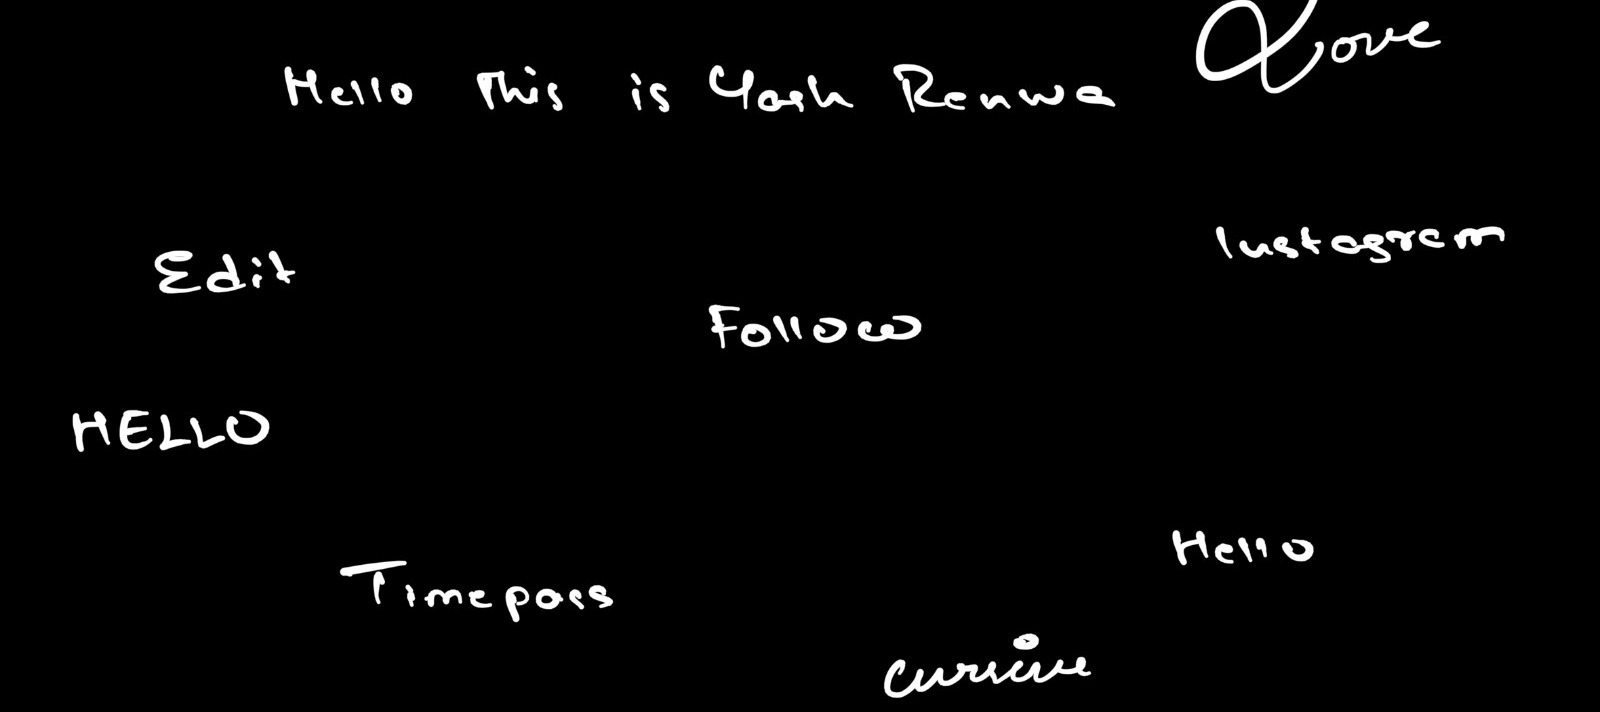

In [19]:
image = cv2.imread("/content/drive/MyDrive/scribble_words_test.jpg")
cv2_imshow(image)

In [12]:
shifted = cv2.pyrMeanShiftFiltering(image,21,51)
gray = cv2.cvtColor(shifted,cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray)
white = cv2.bitwise_not(gray)
reader = easyocr.Reader(["en"])
ocr_output = reader.readtext(white)
for word in ocr_output:
  print(word[1])

Hei(o
Ms
is
Ya+L
@enwe
Cyouc
(ue (es7 ~
Ea;i
Foiiow
hello
Hcifo
Pors
T me
Cwuuiu


In [ ]:
def get_words(image):
  shifted = cv2.pyrMeanShiftFiltering(image,21,51)
  gray = cv2.cvtColor(shifted,cv2.COLOR_BGR2GRAY)
  #cv2_imshow(gray)
  white = cv2.bitwise_not(gray)
  reader = easyocr.Reader(["en"])
  ocr_output = reader.readtext(white)
  cropped_list = []
  text_list = []
  for word_boundary in ocr_output:
    #print(word_boundary[0])
    x,y,w,h = cv2.boundingRect(np.array(word_boundary[0]).astype(int))
    #print(x,y,w,h)
    cropped_list.append([x,y,w,h])
    text_list.append(word_boundary[1])
    cv2.rectangle(white,(x,y),(x+w,y+h),(0,255,0),1)
  cv2_imshow(white)
  return cropped_list,text_list